In [9]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks\\Two_Transmon_MAP_gate_sequence',''))
from instruments.Tektronix_AWG5208.TektronixAWG_core_v2 import AWG5208

In [3]:
# connect to AWG
awg = AWG5208(inst_visaAddress='TCPIP0::192.168.20.43::inst0::INSTR')
# help(awg)
# set sampling rate and reference clock
awg.set_sample_rate(sample_rate=1.0E9)
awg.set_extref_source(ref_freq=10E6)

Connect to Tektronix_AWG_5208 successfully
Statement: TEKTRONIX,AWG5208,B030598,FV:6.6.0131.0


plot size=[20,3]


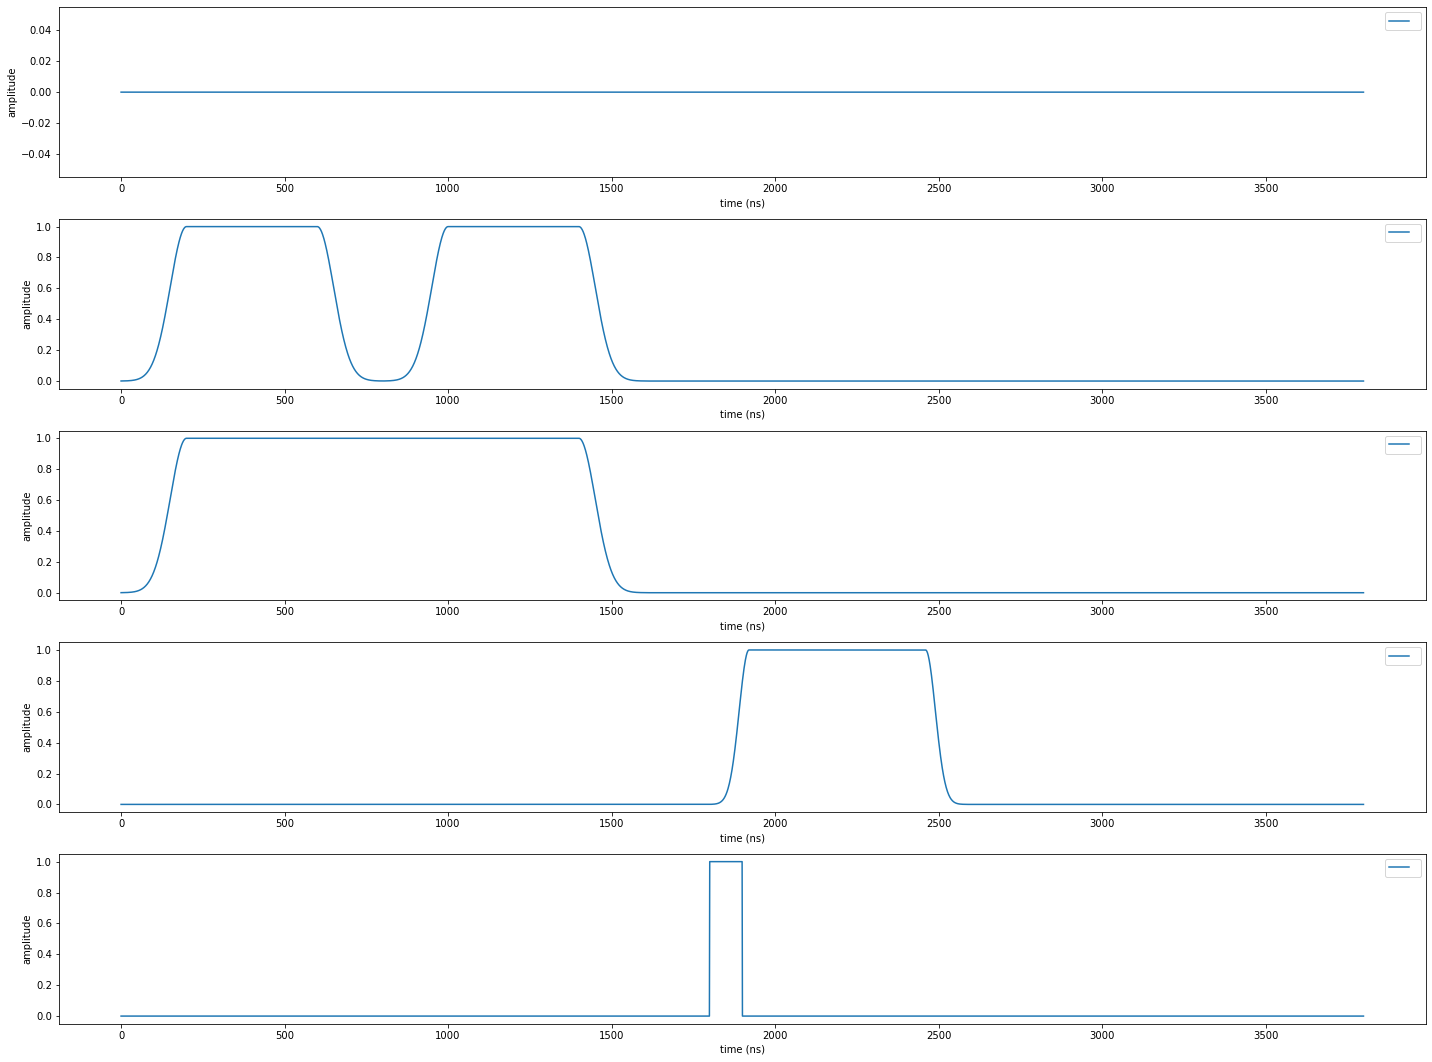

3800
plot size=[20,3]


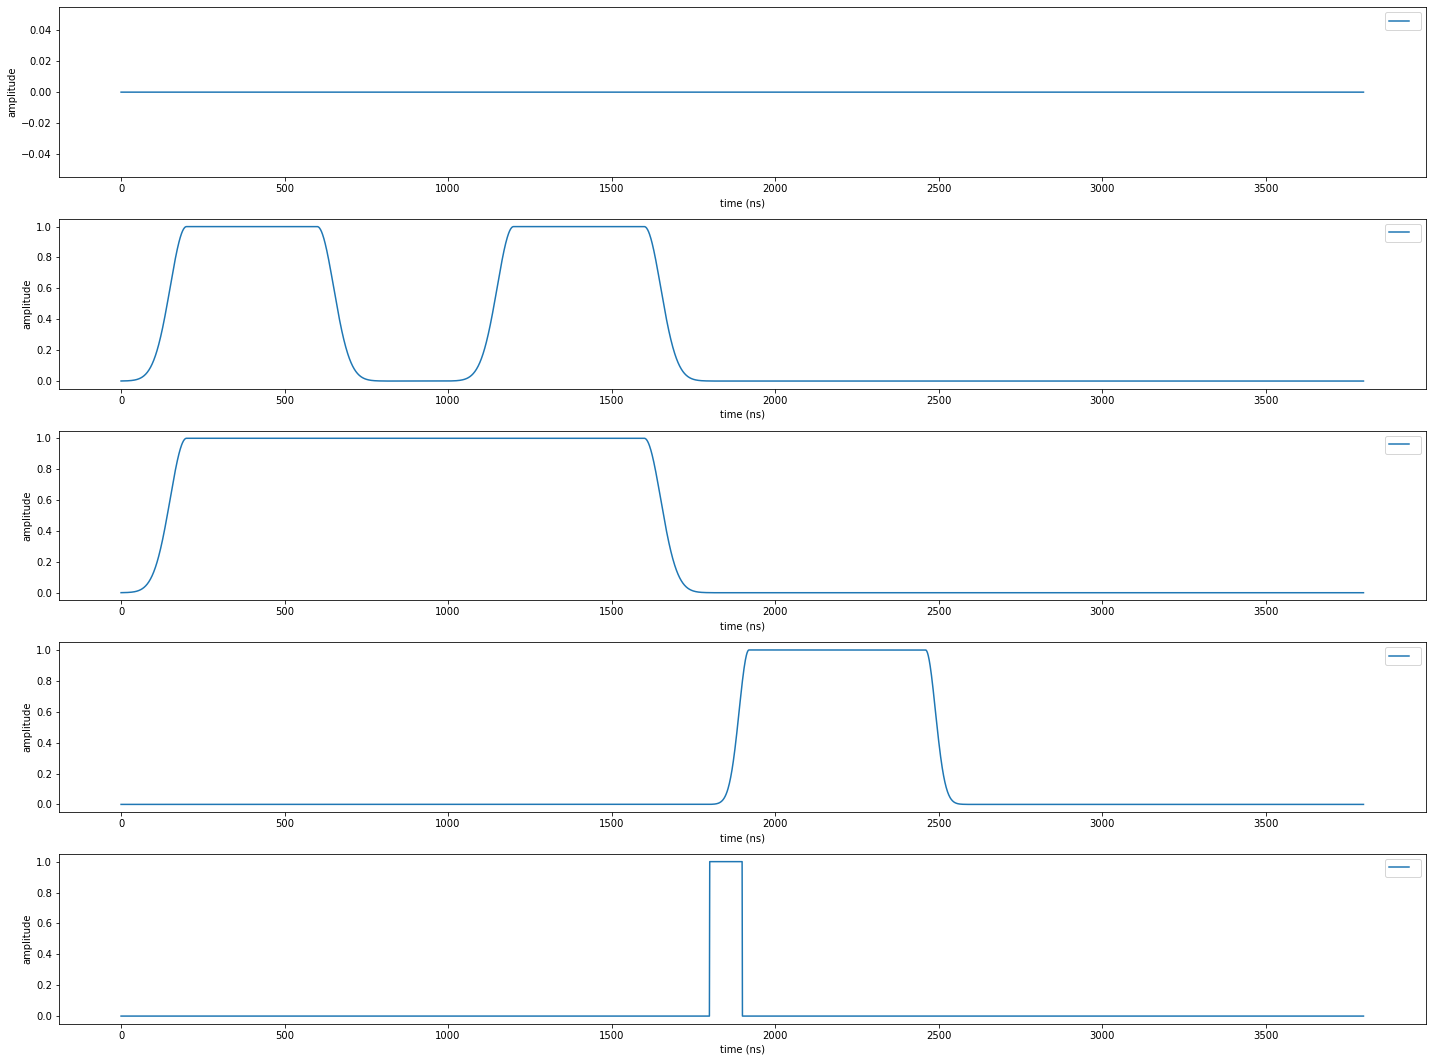

3800
plot size=[20,3]


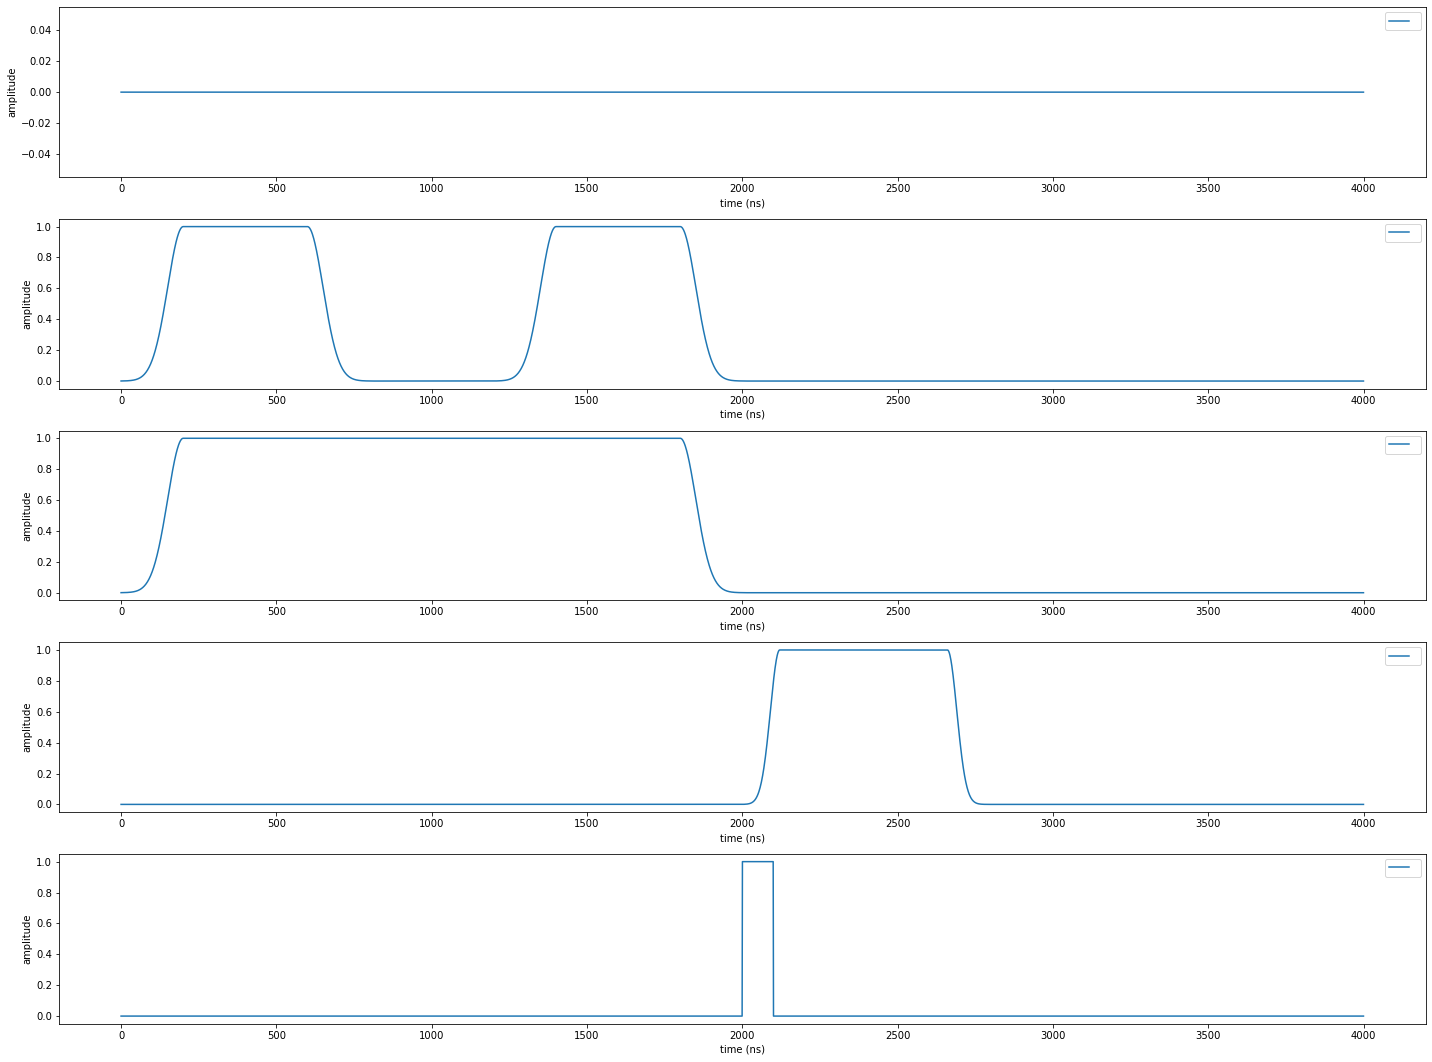

4000
plot size=[20,3]


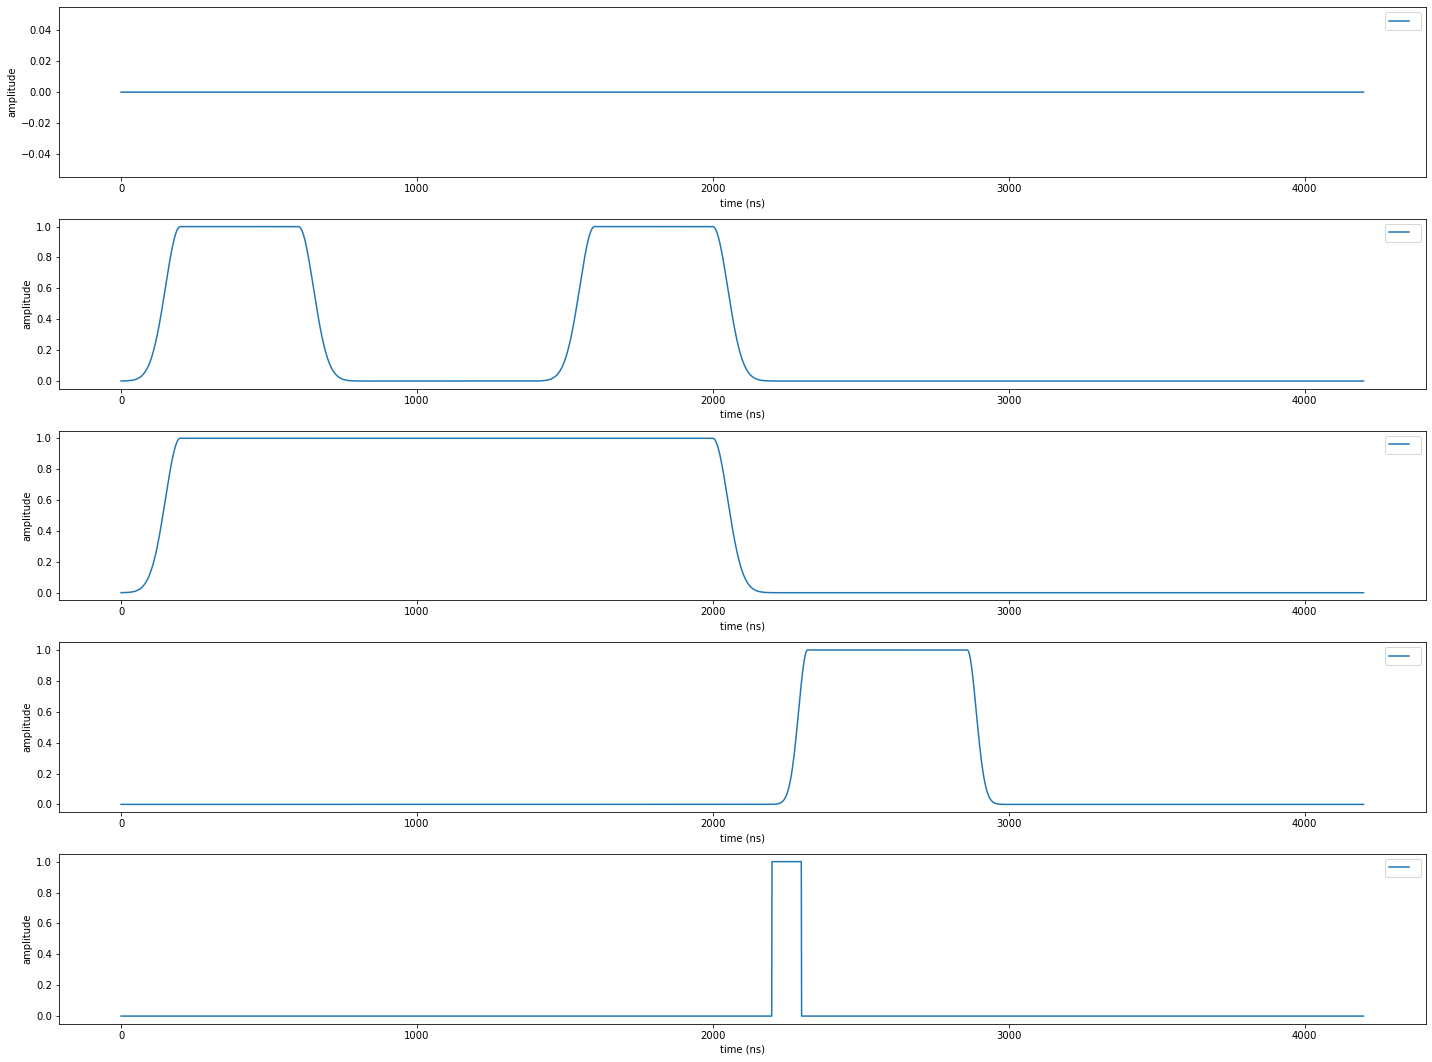

4200
plot size=[20,3]


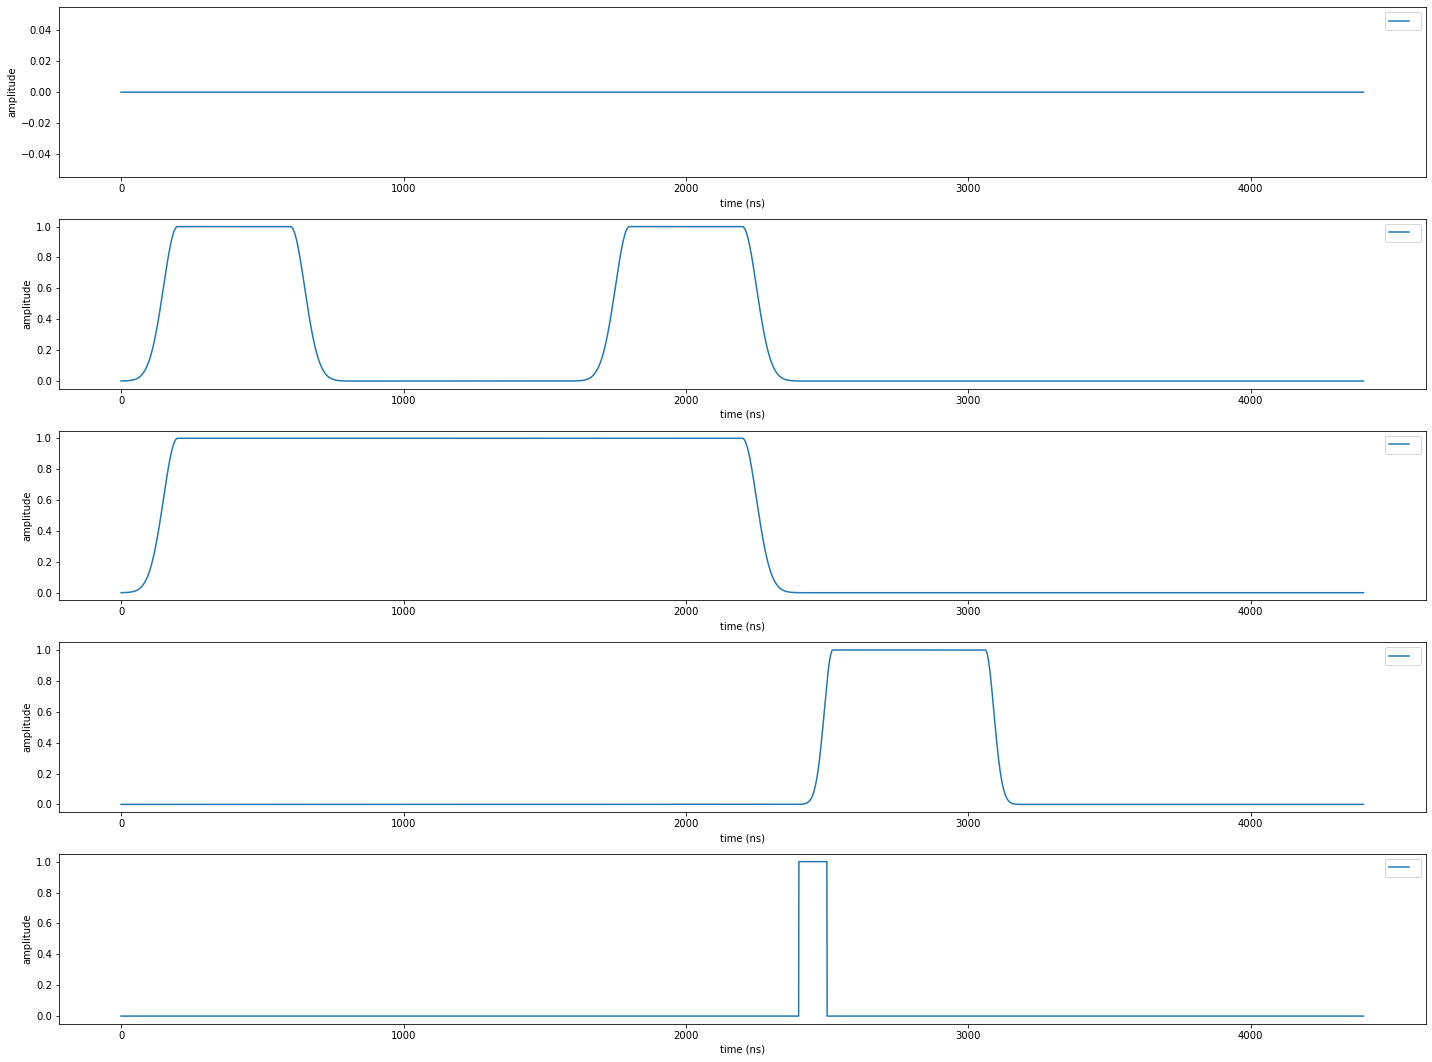

4400
plot size=[20,3]


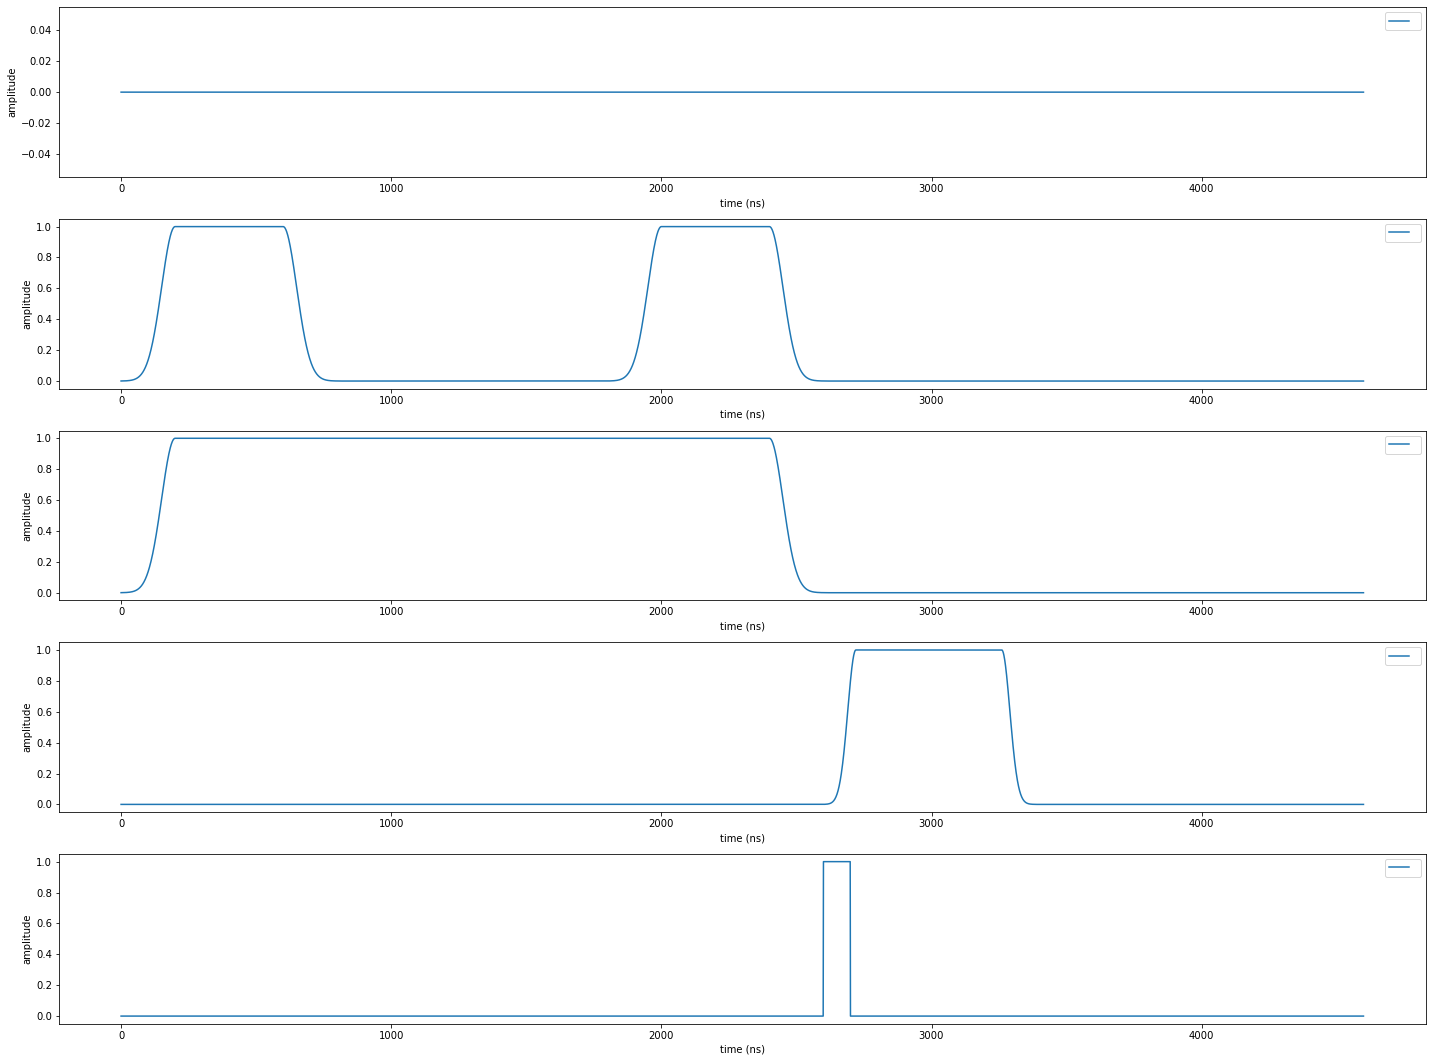

4600
plot size=[20,3]


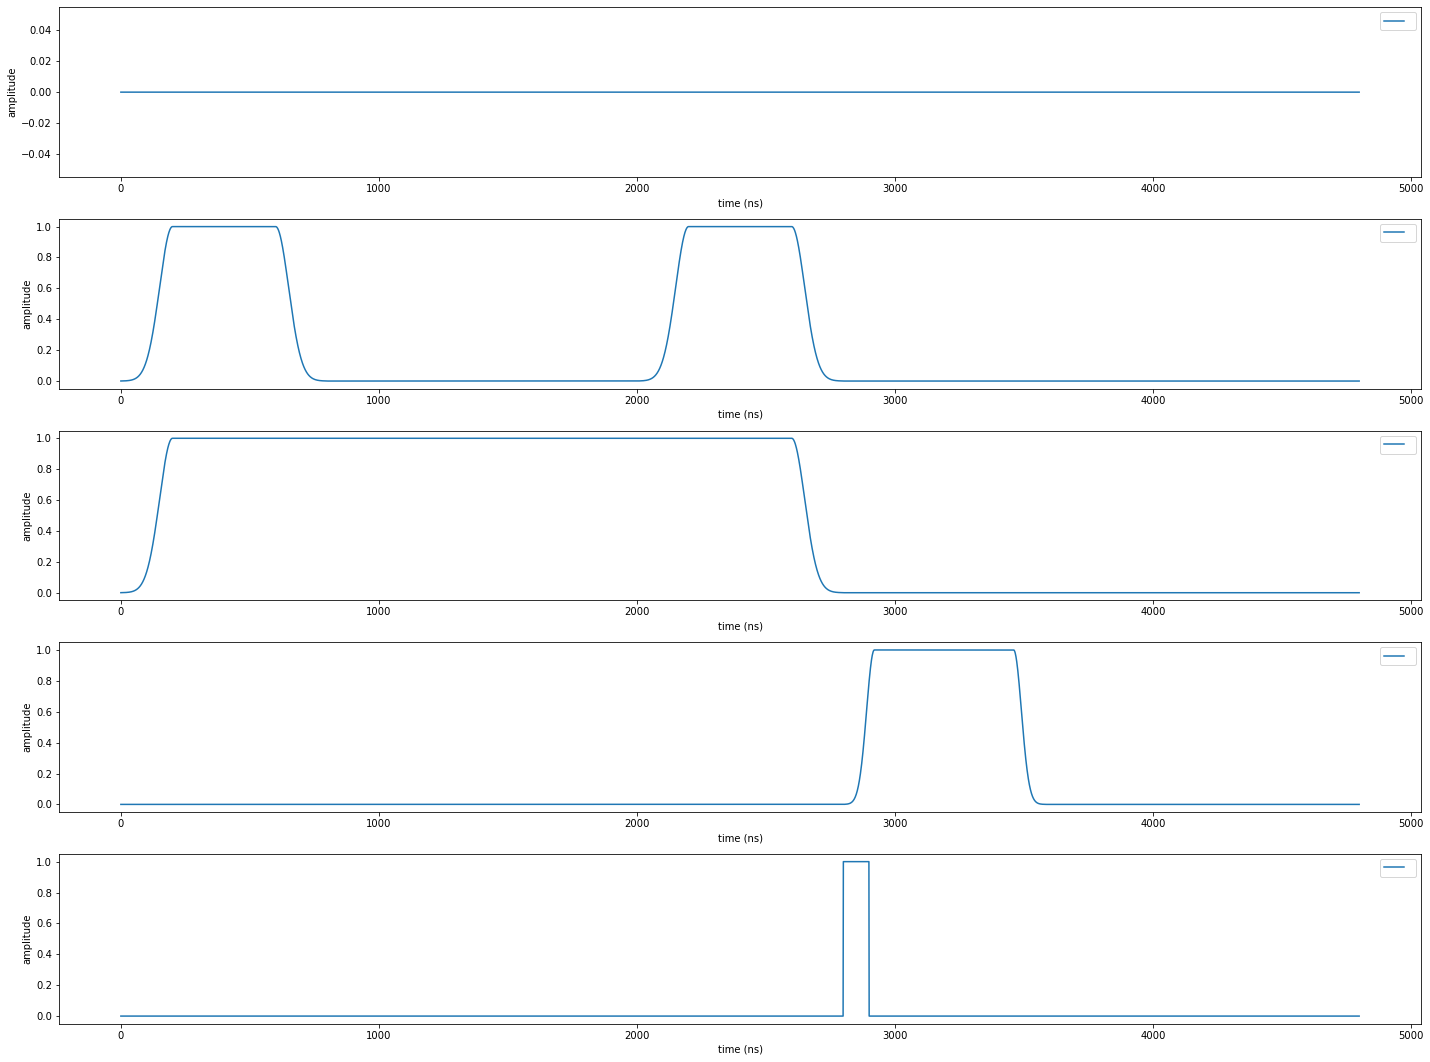

4800
plot size=[20,3]


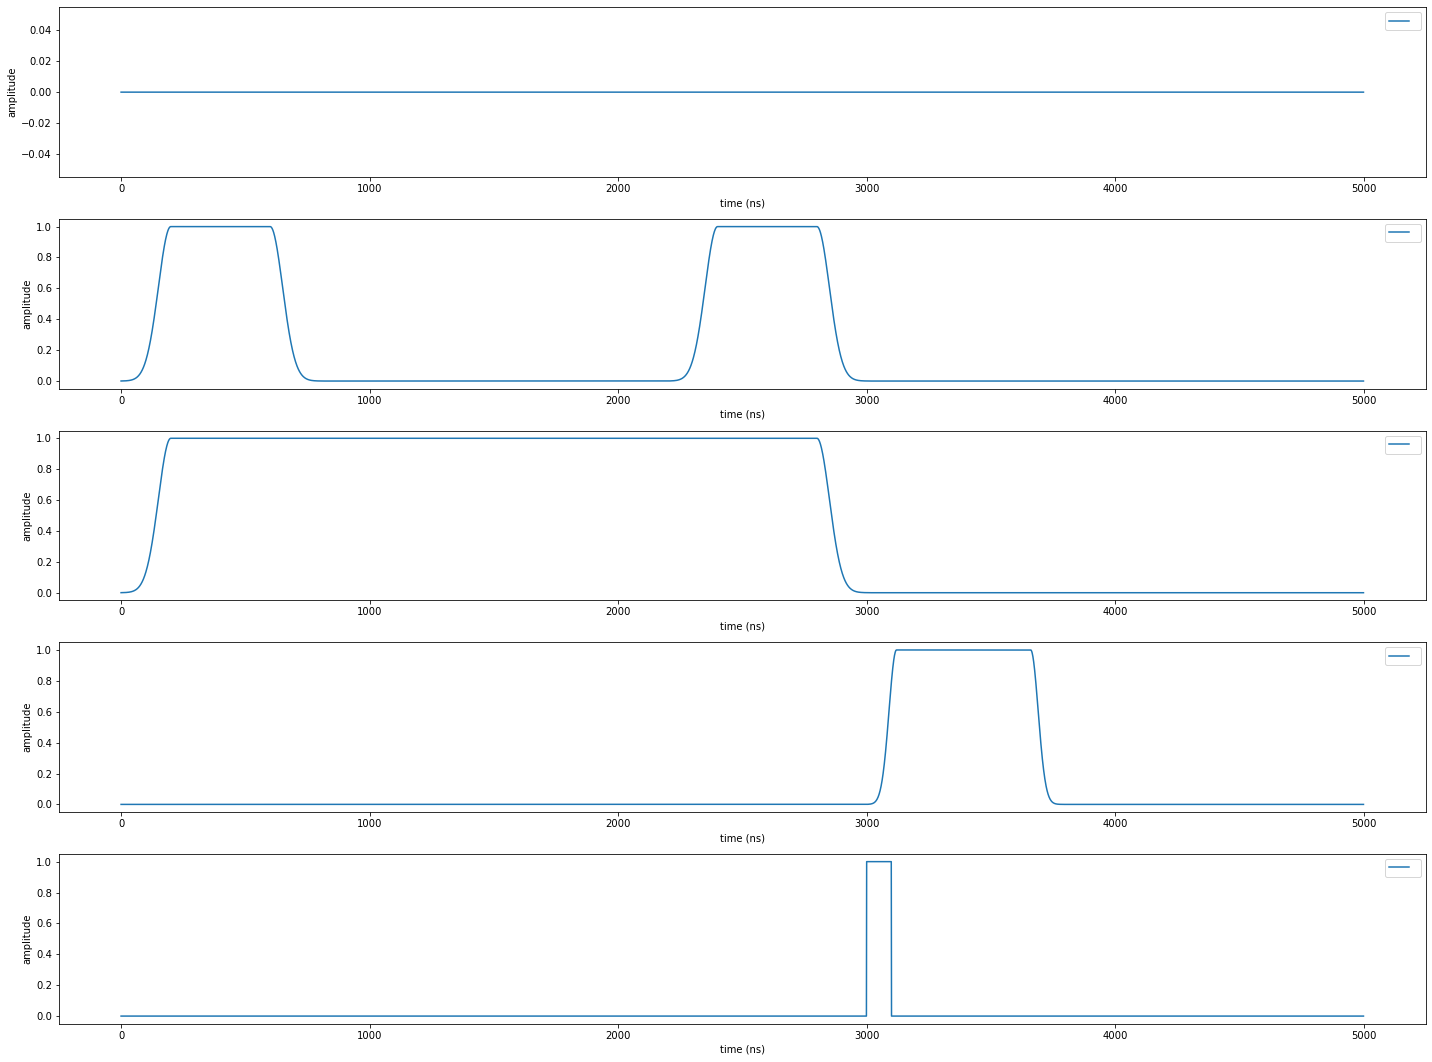

5000
plot size=[20,3]


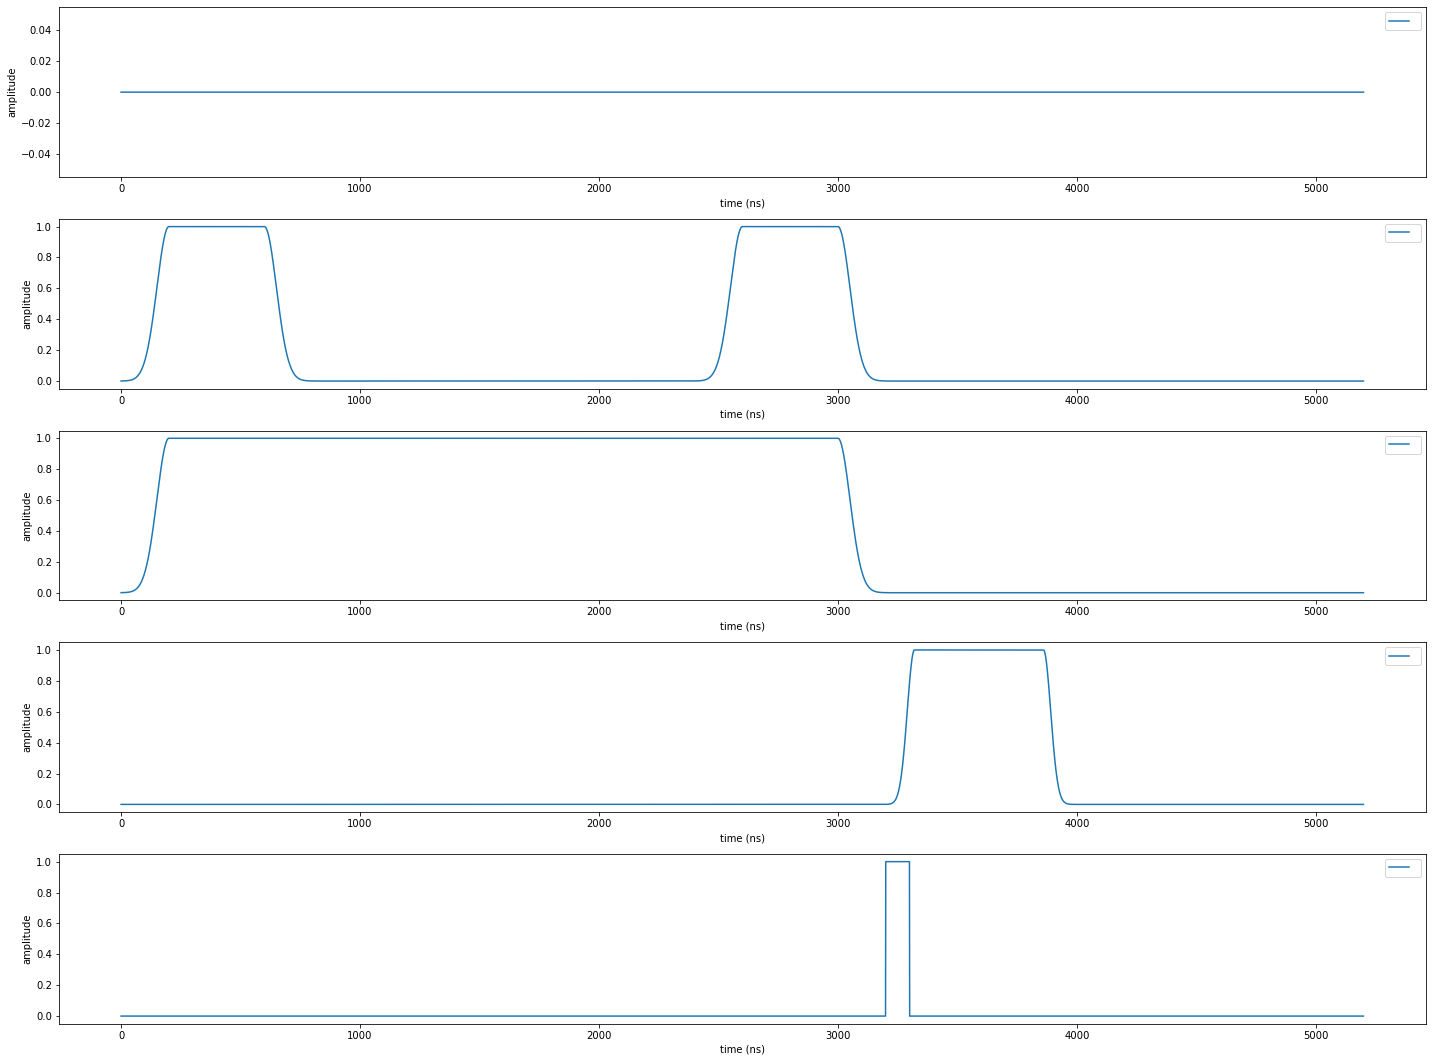

5200
plot size=[20,3]


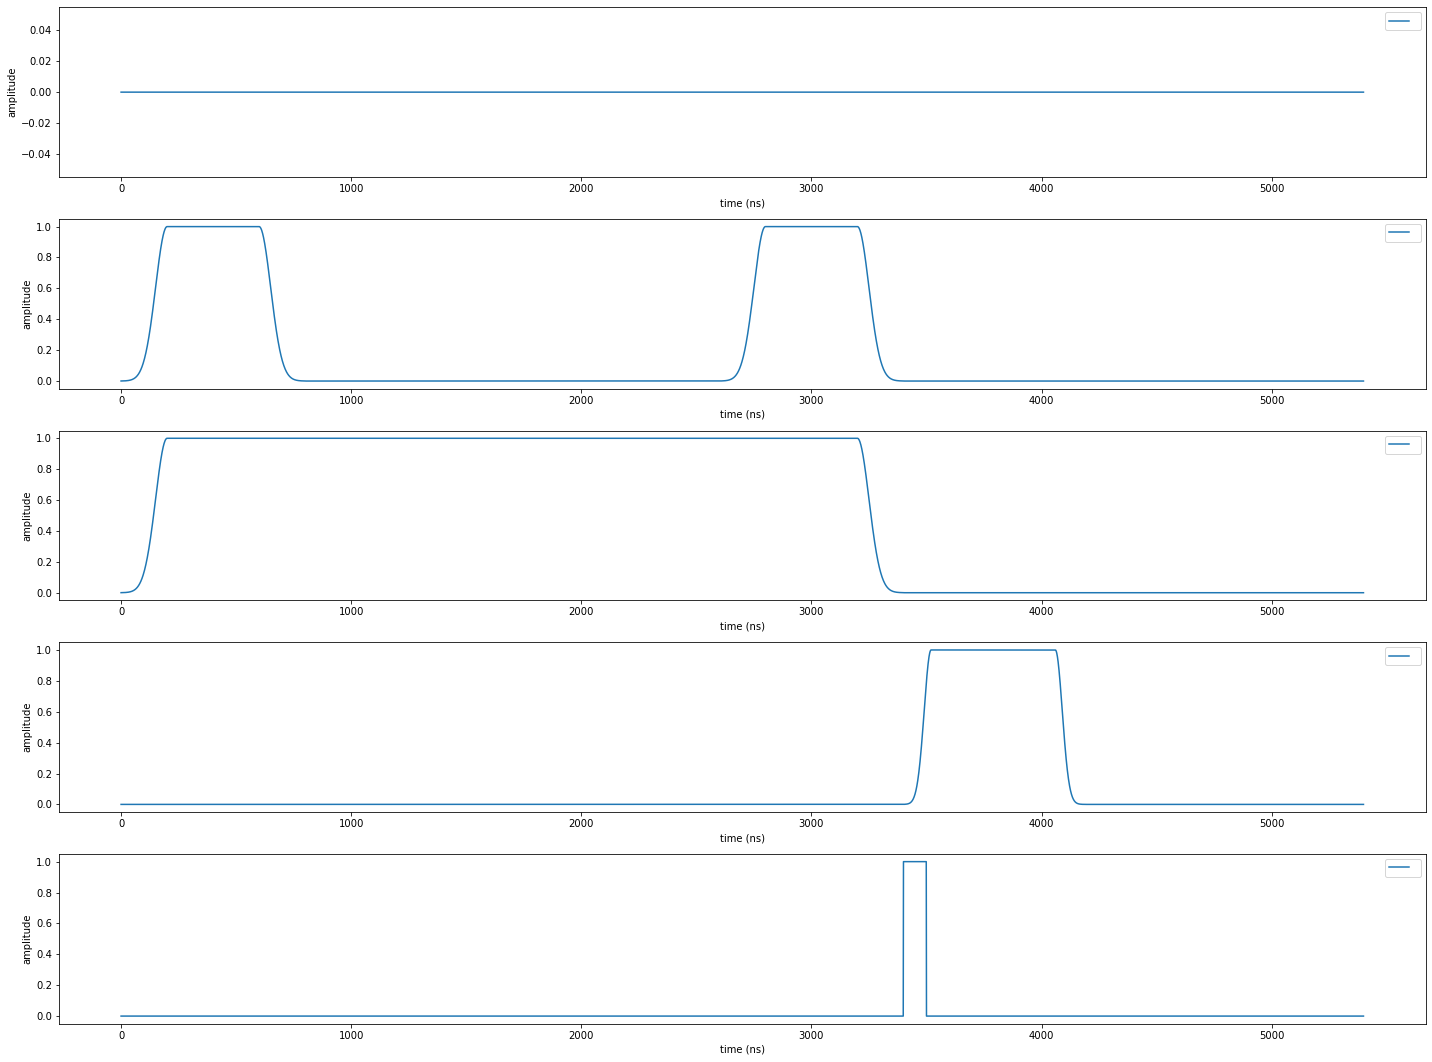

5400


In [11]:
# assign waveforms
from WaveForm_Editor import *
from WavetoolsV6 import Wave

sampling_rate = 1e9
gen_wfm_amount = 10 

ChannelList = ['Q1', 'Q2', 'AC_Stark','ReadOut']

drive_sigmalen = 50
readout_sigmalen = 30

ramsey_half_pi = 400
ramsey_precession_delta = 20

readout_sigmalen = 30
readout_duration = 300
relaxation =2000

mkr_duration = 100


gate_duration = drive_sigmalen*16 + ramsey_half_pi*2 + ramsey_precession_delta
readout_duration = readout_sigmalen*8 + readout_duration 

offset_1 = gate_duration
offset_2 = relaxation

for idx in range(gen_wfm_amount):

    ACStark_duration  =  drive_sigmalen*8 + ramsey_half_pi*2 + ramsey_precession_delta*idx 
   
    a = Wave(NullPulse,[offset_1])  

    b = Wave(GaussianPulse,[drive_sigmalen,ramsey_half_pi])

    c = Wave(GaussianPulse,[drive_sigmalen,ACStark_duration])

    d = Wave(NullPulse,[ramsey_precession_delta*idx])
      
    e = Wave(GaussianPulse,[readout_sigmalen,readout_duration])

    m = Wave(SquarePulse,[mkr_duration])

    n = Wave(NullPulse,[offset_2]) 


    qb1 = ~a

    qb2 = ~b + ~d + ~b 

    AC_Stark = ~c 

    readout = ~e

    mkr = ~m

    Null_1 = ~a 

    Null_2 = ~n





    gate = ~qb1 / ~qb2 / ~AC_Stark / ~Null_1/ ~Null_1

    ReadOut = ~Null_2 / ~Null_2 / ~Null_2 / ~readout / ~mkr

    output = gate + ReadOut
    
    #awg.set_wfm(wfm_name=f'{ChannelList[0]}_{idx+1}', wfm=(output.y[0]))
    #awg.set_wfm(wfm_name=f'{ChannelList[1]}_{idx+1}', wfm=(output.y[1]))
    #awg.set_wfm(wfm_name=f'{ChannelList[2]}_{idx+1}', wfm=(output.y[2]))
    #awg.set_wfm(wfm_name=f'{ChannelList[3]}_{idx+1}', wfm=(output.y[3]),mkr1=(output.y[4]))
 
    output.plot(size=[20,3])

    print(len(output.y[0]))

# clear, set, and upload
#awg.clr_wfm()


#awg.upload_wfm()


In [5]:

# assign waveform to corresponding sequence position one at a time
seq_name='MAP_gate'
trackList = ChannelList

# clear, set, assign and upload

awg.clr_seq()
awg.set_seq(seq_name, num_track=len(trackList), num_step=gen_wfm_amount)
for track_idx, track in enumerate(trackList):
    print(track_idx,track)
    for step_idx in range(gen_wfm_amount):
        print(step_idx)
        awg.assign_seq(f'{track}_{step_idx+1}',seq_name, track_idx+1, step_idx+1)
awg.upload_seq(seq_name)


0 Q1
0


KeyError: 'Q1_1'

In [ ]:
# assign waveforms/sequences to channels
awg.assign_ch(1, 'MAP_gate', track_index=1)
awg.assign_ch(2, 'MAP_gate', track_index=2)
awg.assign_ch(3, 'MAP_gate', track_index=3)
awg.assign_ch(4, 'MAP_gate', track_index=4)
# for sequence 
#awg.assign_ch(1, f'{ChannelList[0]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(2, f'{ChannelList[1]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(3, f'{ChannelList[2]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(4, f'{ChannelList[3]}', auto_output=False, auto_mkr=True)
#awg.assign_ch(5, 'Q_1000000.0', auto_output=False, auto_mkr=False)# for waveform

In [ ]:
# set channel amplitudes
awg.set_ch_amp(ch=1, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=2, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=3, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=4, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=5, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)

In [ ]:
print(awg)
# del awg